In [3]:
#Librerias

import json
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from seaborn import distplot
from wordcloud import WordCloud

from sklearn.cluster import KMeans


In [4]:
df = pd.read_parquet('Dataset\df_movies_final', engine='fastparquet')

In [5]:
df.head(5)

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,...,tagline,title,vote_average,vote_count,release_year,return,release_day,release_month,director,actores
index,,,,,,,,,,,,,,,,,,,,,
0,Toy Story Collection,30000000,"[Animation, Comedy, Family]",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,[Pixar Animation Studios],[United States of America],1995-10-30,...,None,Toy Story,7.7,5415.0,1995,12.451801,Lunes,Octubre,John Lasseter,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney..."
1,None,65000000,"[Adventure, Fantasy, Family]",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,...,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,1995,4.043035,Viernes,Diciembre,Joe Johnston,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,..."
2,Grumpy Old Men Collection,0,"[Romance, Comedy]",15602,en,A family wedding reignites the ancient feud be...,11.712900,"[Warner Bros., Lancaster Gate]",[United States of America],1995-12-22,...,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,1995,0.000000,Viernes,Diciembre,Howard Deutch,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop..."
3,None,16000000,"[Comedy, Drama, Romance]",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[Twentieth Century Fox Film Corporation],[United States of America],1995-12-22,...,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,1995,5.090760,Viernes,Diciembre,Forest Whitaker,"[Whitney Houston, Angela Bassett, Loretta Devi..."
4,Father of the Bride Collection,0,[Comedy],11862,en,Just when George Banks has recovered from his ...,8.387519,"[Sandollar Productions, Touchstone Pictures]",[United States of America],1995-02-10,...,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,1995,0.000000,Viernes,Febrero,Charles Shyer,"[Steve Martin, Diane Keaton, Martin Short, Kim..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45451 entries, 0 to 45537
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  4497 non-null   object        
 1   budget                 45451 non-null  int64         
 2   genres                 45451 non-null  object        
 3   id                     45451 non-null  object        
 4   original_language      45440 non-null  object        
 5   overview               44510 non-null  object        
 6   popularity             45451 non-null  float64       
 7   production_companies   45451 non-null  object        
 8   production_countries   45451 non-null  object        
 9   release_date           45451 non-null  datetime64[ns]
 10  revenue                45451 non-null  float64       
 11  runtime                45451 non-null  int32         
 12  spoken_languages       45451 non-null  object        
 13  status

### EDA SOBRE VARIABLES NUMERICAS

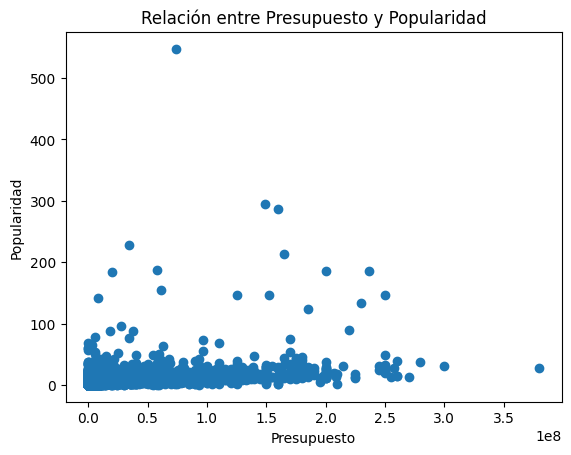

In [7]:
# Grafico de dispersion presupuesto vs. popularidad:

plt.scatter(df['budget'], df['popularity'])
plt.xlabel('Presupuesto')
plt.ylabel('Popularidad')
plt.title('Relación entre Presupuesto y Popularidad')
plt.show();

Podemos observar que no hay una relacion entre el presupuesto y la popularidad ya que los niveles mas altos de popularidad no dependen del presupuesto de la pelicula

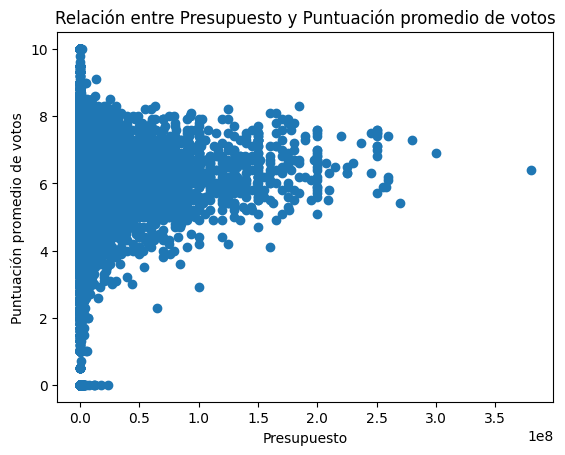

In [8]:
# Grafico de dispersion presupuesto vs. puntuacion promedio de votos:

plt.scatter(df['budget'], df['vote_average'])
plt.xlabel('Presupuesto')
plt.ylabel('Puntuación promedio de votos')
plt.title('Relación entre Presupuesto y Puntuación promedio de votos')
plt.show();

Se puede observar una ligera concentracion al medio de la puntuacion promedio de las peliculas, esto se puede deber a que las que tiene menos presupuesto llegan mas facilmente a plataformas de contenido y en epocas ateriores a la television. Tambien se observa que las peliculas con determinado nivel de  presupuesto estan entre el promedio de 4 y 8 cantidades de votos, esto se puede deber a que cuentan con presupuesto para promocionar la pelicula.

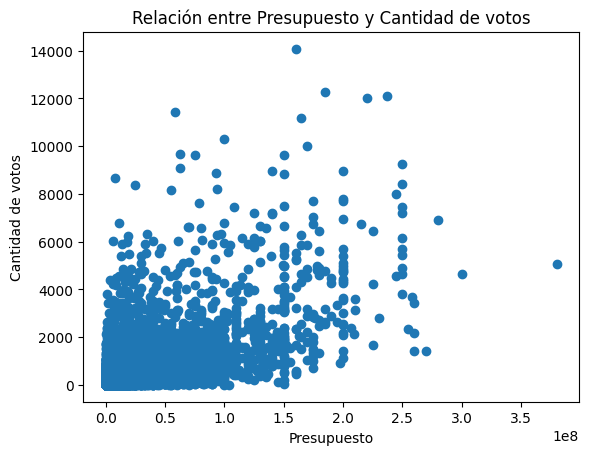

In [9]:
# Grafico de dispersion presupuesto vs. cantidad de votos
plt.scatter(df['budget'], df['vote_count'])
plt.xlabel('Presupuesto')
plt.ylabel('Cantidad de votos')
plt.title('Relación entre Presupuesto y Cantidad de votos')
plt.show();

Se observa lo mismo que en el grafico anterior lo cual refuta la hipotesis planteada en el grafico anterior pero lo raro es que la que mayor presupuesto tiene no tiene una gran mejoraria comparado con las que tienen de 0.5 a 2.5 de presupuesto.

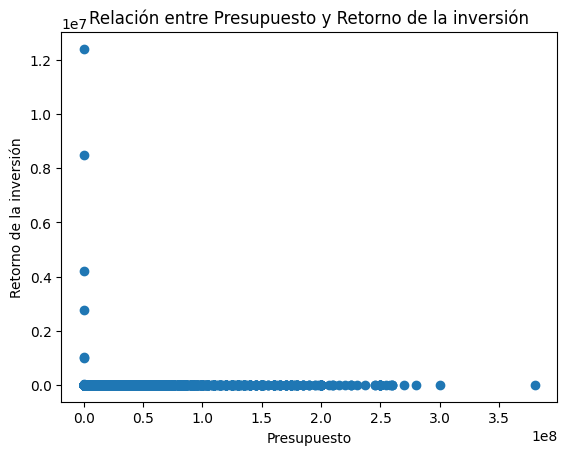

In [10]:
# Grafico de dispersion presupuesto vs. retorno de la inversion

plt.scatter(df['budget'], df['return'])
plt.xlabel('Presupuesto')
plt.ylabel('Retorno de la inversión')
plt.title('Relación entre Presupuesto y Retorno de la inversión')
plt.show();

No hay una relacion entre presupuesto y retorno de inversion, lo cual viendo la industria del cine y los fracasos millonarios que se han visto a lo largo de la historia, nos dan cuenta que si el guion y forma de contar la historia no son buenas no importa la cantidad de plata que pongas para realizarla no sera consumida.

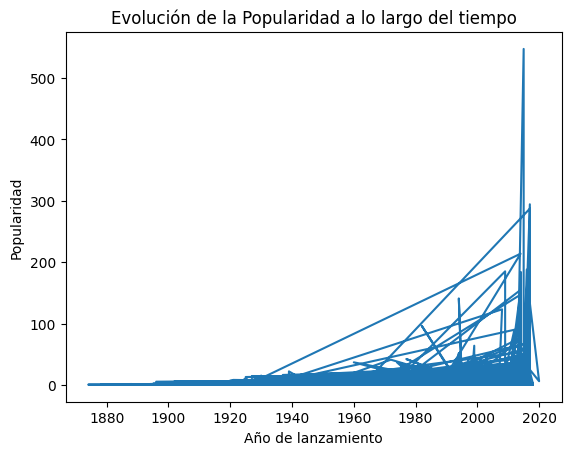

In [11]:
# Grafico de barras evolucion de la popularidad a lo largo del tiempo 

plt.plot(df['release_year'], df['popularity'])
plt.xlabel('Año de lanzamiento')
plt.ylabel('Popularidad')
plt.title('Evolución de la Popularidad a lo largo del tiempo')
plt.show();

Imposible realizar algun tipo de analisis sobre este grafico 

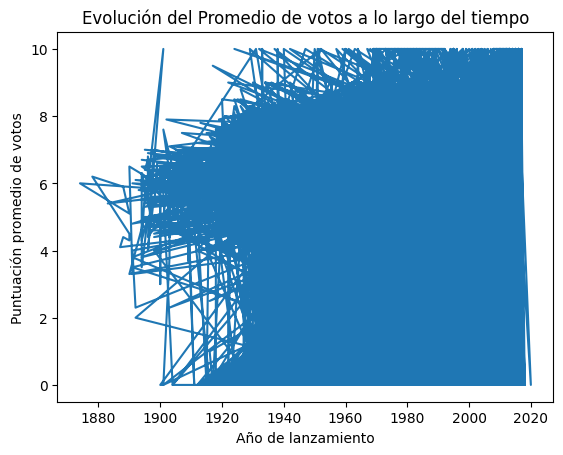

In [12]:
# Grafico de barras evolucion de la cantidad de votos a lo largo del tiempo
plt.plot(df['release_year'], df['vote_average'])
plt.xlabel('Año de lanzamiento')
plt.ylabel('Puntuación promedio de votos')
plt.title('Evolución del Promedio de votos a lo largo del tiempo')
plt.show();

Imposible sacar conclusiones sobre este grafico 

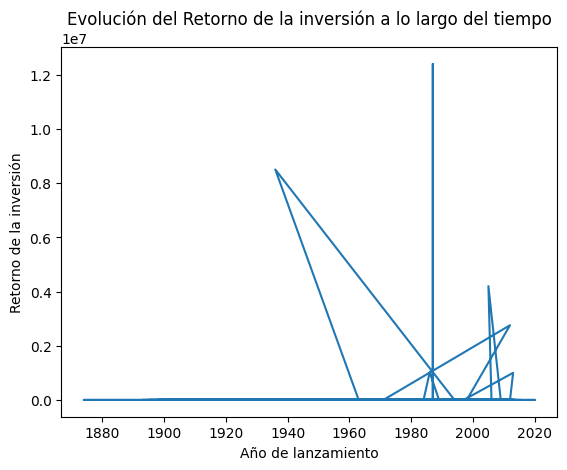

In [13]:
# Grafico de barras evolucion del retorno de la inversión a lo largo del tiempo

plt.plot(df['release_year'], df['return'])
plt.xlabel('Año de lanzamiento')
plt.ylabel('Retorno de la inversión')
plt.title('Evolución del Retorno de la inversión a lo largo del tiempo')
plt.show();

Imposible generar hipotesis sobre este grafico, salvo que a partir de los 1960 se ve algo de retorno de inversion 

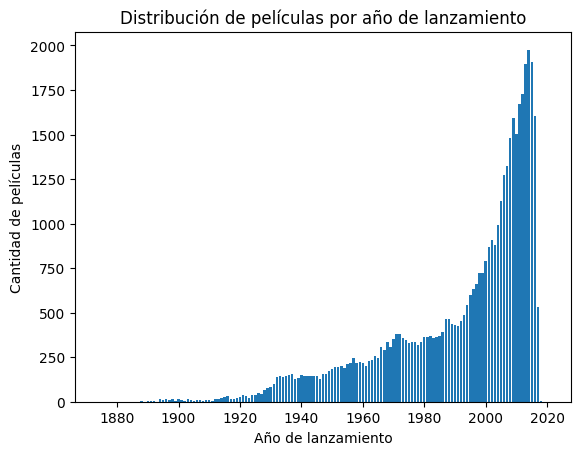

In [14]:
# Calcula el recuento de películas por año de lanzamiento
year_counts = df['release_year'].value_counts().sort_index()

# Crea el gráfico de barras
plt.bar(year_counts.index, year_counts.values)

# Etiquetas y título
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de películas')
plt.title('Distribución de películas por año de lanzamiento')

# Muestra el gráfico
plt.show();

Se puede observar el creciemiento que tuvo la industria de las peliculas hasta donde llega el dataset

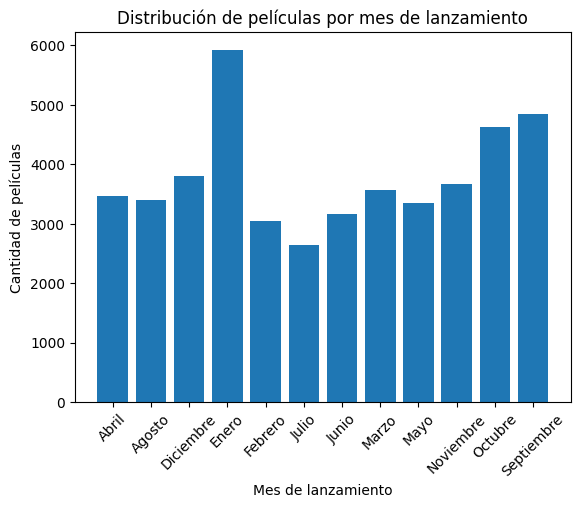

In [15]:
# Calculo el recuento de películas por mes de lanzamiento
month_counts = df['release_month'].value_counts().sort_index()

# Creo el gráfico de barras
plt.bar(month_counts.index, month_counts.values)

# Etiquetas y título
plt.xlabel('Mes de lanzamiento')
plt.ylabel('Cantidad de películas')
plt.title('Distribución de películas por mes de lanzamiento')

# Roto los nombres de los meses en el eje x a 45 grados, ya que se solapaban
plt.xticks(rotation=45)

# Muestro el gráfico
plt.show()

Los meses de enero, octubre y septiembre son los meses que mas lanzamientos de peliculas tienen, con lo cual deben ser los meses de mayor facturacion.

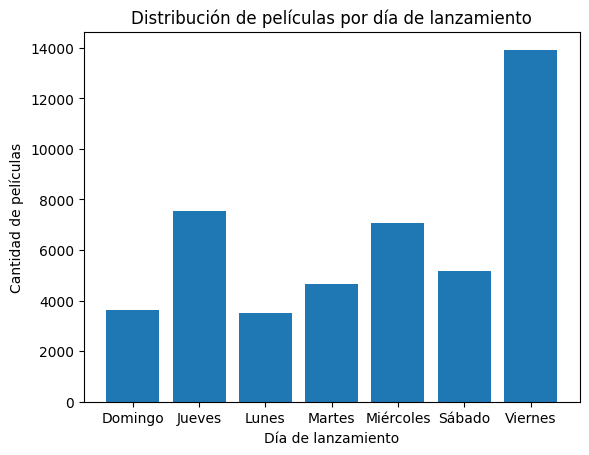

In [16]:
# Calculo el recuento de películas por día de lanzamiento
day_counts = df['release_day'].value_counts().sort_index()

# Cre0 el gráfico de barras
plt.bar(day_counts.index, day_counts.values)

# Etiquetas y título
plt.xlabel('Día de lanzamiento')
plt.ylabel('Cantidad de películas')
plt.title('Distribución de películas por día de lanzamiento')

# Muestro el gráfico
plt.show();

Los viernes son el dia de mayor lanzamientos de estrenos con lo cual, si es una pelicula muy promocionada recomendaria lanzarla un dia que no tenga tanta competencia como los viernes.

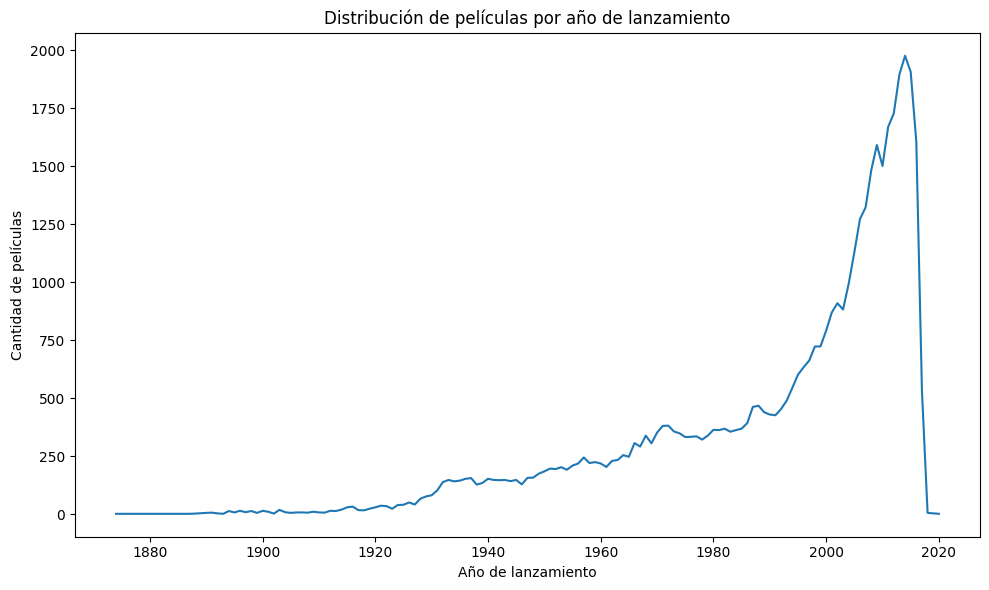

In [17]:
# Grafico con el recuento de películas por año
year_counts = df['release_year'].value_counts().sort_index()

# Creo el gráfico de barras o gráfico de línea
plt.figure(figsize=(10, 6))
plt.plot(year_counts.index, year_counts.values)


# Etiquetas y título
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de películas')
plt.title('Distribución de películas por año de lanzamiento')

# Muestro el gráfico
plt.tight_layout()
plt.show()

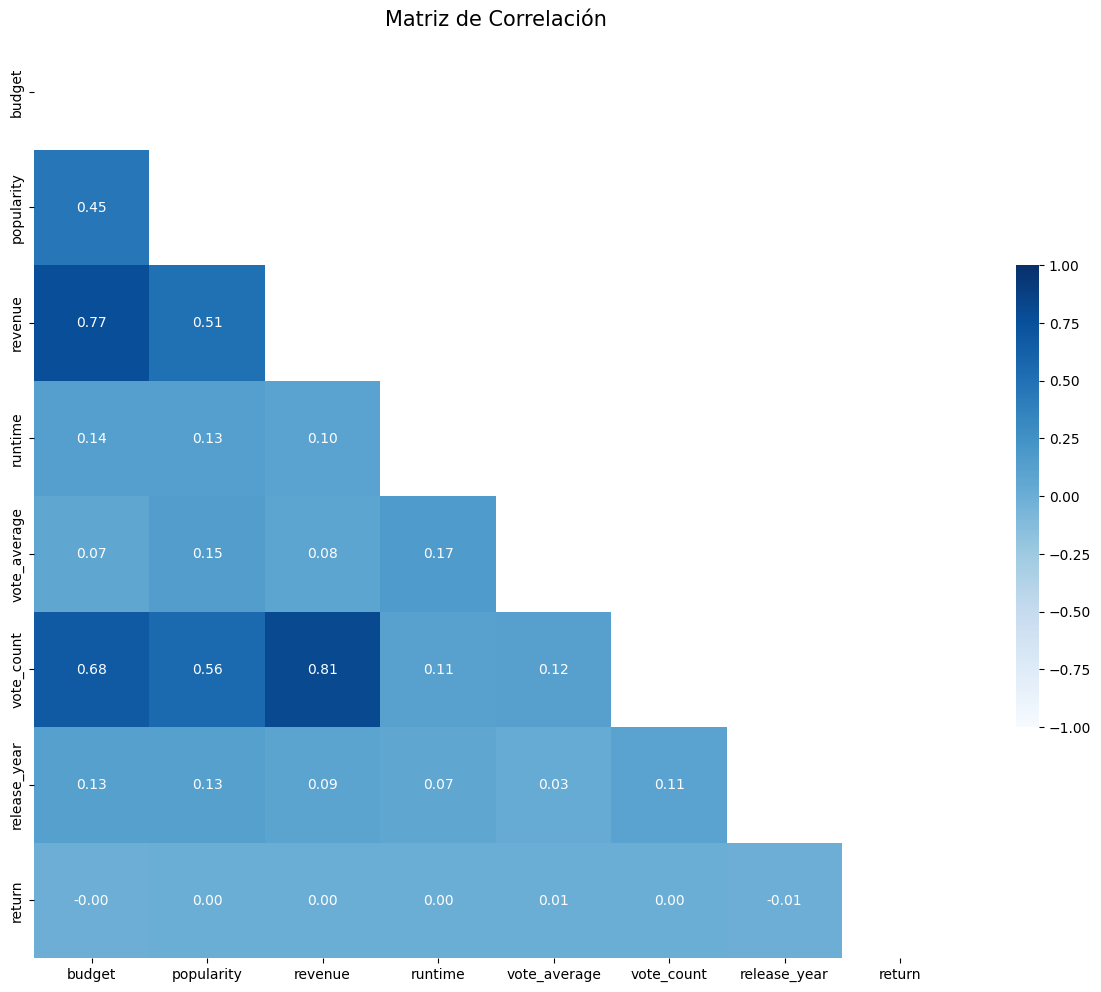

In [18]:
# Creo la correlacion entre las variables numericas:
correlation = df.corr(numeric_only = True)

# Genero una máscara para mostrar solo el triangulo inferior
mask = np.triu(correlation)
cor = plt.figure(figsize=(15,12)) # Defino el tamaño del grafico
ax = plt.axes()

#Genero el mapa de calor
sns.heatmap(correlation,
            cbar = True,
            square = True,
            annot = True,
            fmt = '.2f',
            cmap = 'Blues',
            vmin =-1,
            vmax =1,
            center = 0,
            cbar_kws = {'shrink': 0.5},
            mask = mask,
            ax = ax
            )

ax.set_title("Matriz de Correlación",
             fontsize=15)
plt.show();

Se observa una correlacion fuerte entre recaudacion y cantidad de votos lo cual es predescible ya que si es taquillera generalmente tendra mas votos. Por otro lado la me llama la atencion el 0.77 de correlacion entre presupuesto y recaudacion ya que en el grafico no mostro nada.

### EDA SOBRE VARIABLES CATEGORICAS

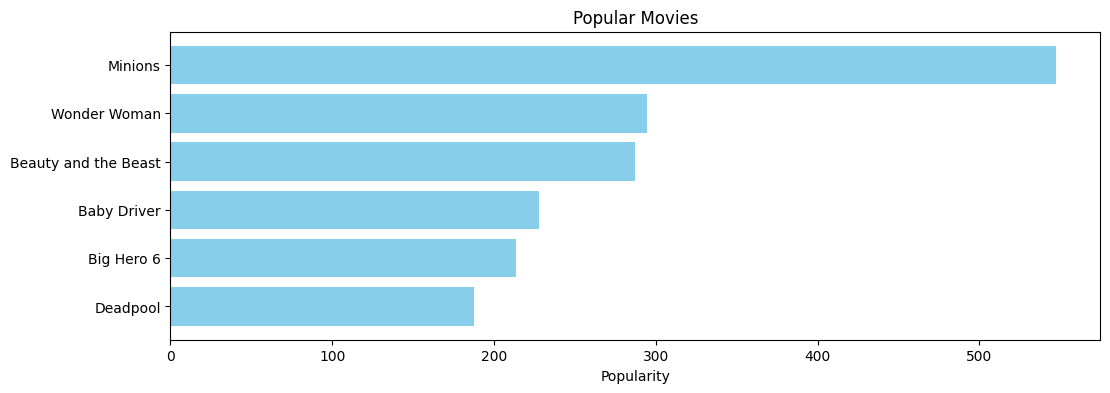

In [19]:
# Voy a graficar la Popularidad de las peliculas y sus nombres 

pop= df.sort_values('popularity', ascending=False)

plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")
plt.show();

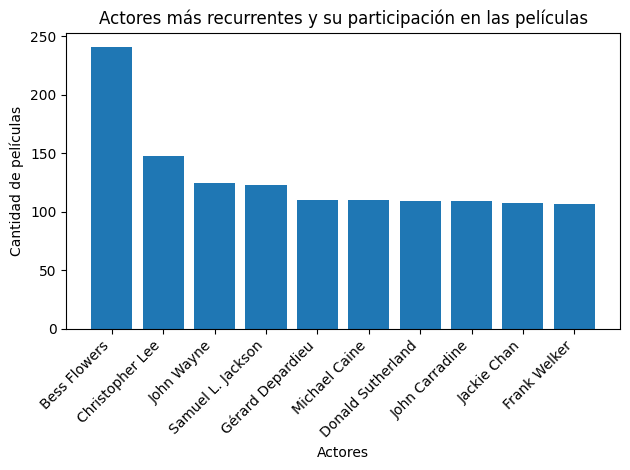

In [20]:
# Grafico de actores recurrentes y sus participaciones en peliculas

# Desgloso la lista de actores en filas separadas
exploded_actors = df['actores'].explode()

# Calculo la frecuencia de los actores más recurrentes
top_actors = exploded_actors.value_counts().head(10)

# Cre0 el grafico de barras
plt.bar(top_actors.index, top_actors.values)

# Etiquetas y título
plt.xlabel('Actores')
plt.ylabel('Cantidad de películas')
plt.title('Actores más recurrentes y su participación en las películas')

# Ajusta las etiquetas del eje x para evitar superposiciones
plt.xticks(rotation=45, ha='right')

# Muestro el gráfico
plt.tight_layout()
plt.show();

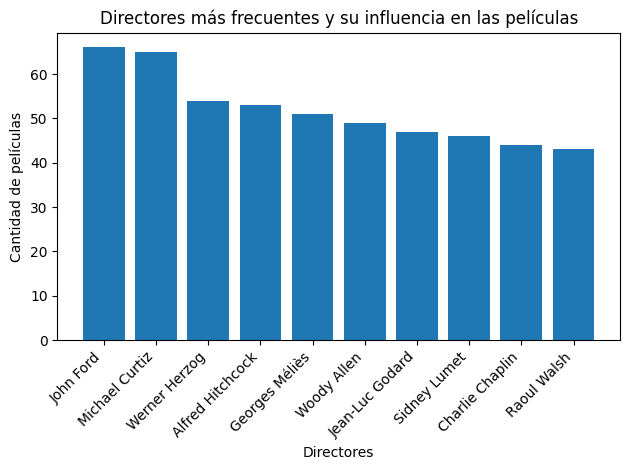

In [21]:
# Grafico de los directores mas frecuentes y su influencia en las películas.

# Calculo la frecuencia de los directores más frecuentes
top_directors = df['director'].value_counts().head(10)

# Creo el gráfico de barras
plt.bar(top_directors.index, top_directors.values)

# Etiquetas y título
plt.xlabel('Directores')
plt.ylabel('Cantidad de películas')
plt.title('Directores más frecuentes y su influencia en las películas')

# Ajusto las etiquetas del eje x para evitar superposiciones
plt.xticks(rotation=45, ha='right')

# Muestro el gráfico
plt.tight_layout()
plt.show()

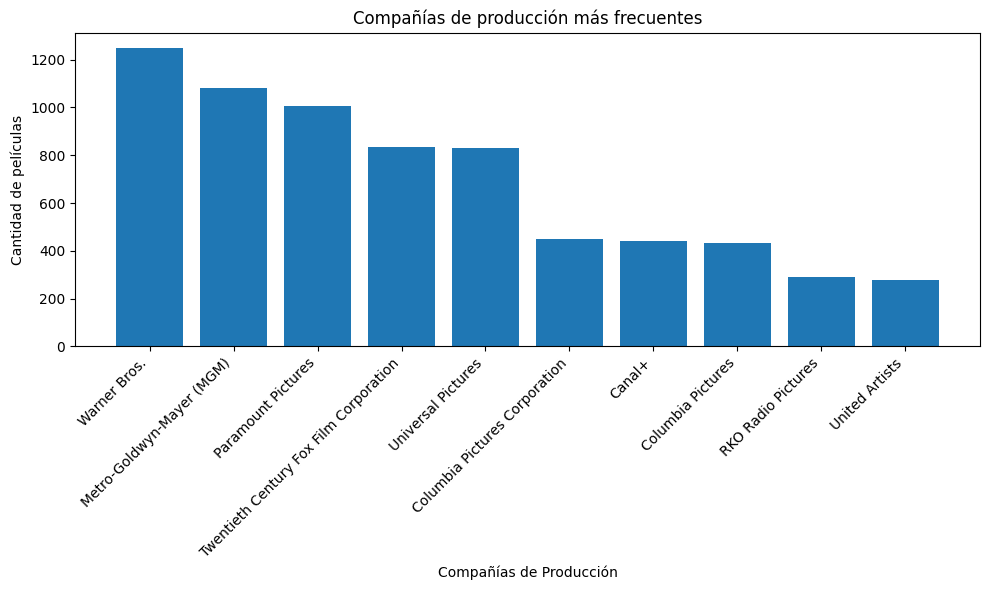

In [22]:
# Desgloso la lista de compañías de producción en filas separadas
exploded_companies = df['production_companies'].explode()

# Calculo la frecuencia de las compañías de producción más frecuentes
top_companies = exploded_companies.value_counts().head(10)

# Creo el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_companies.index, top_companies.values)

# Etiquetas y título
plt.xlabel('Compañías de Producción')
plt.ylabel('Cantidad de películas')
plt.title('Compañías de producción más frecuentes')

# Ajusto las etiquetas del eje x para evitar superposiciones
plt.xticks(rotation=45, ha='right')

# Muestro el gráfico de barras
plt.tight_layout()
plt.show()

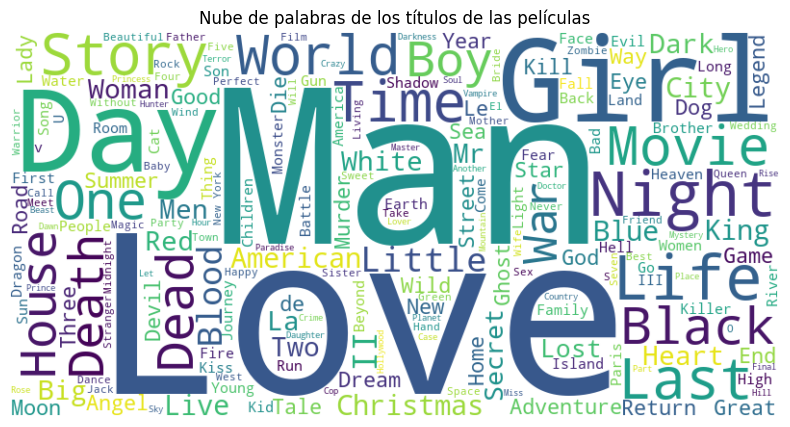

In [23]:
#Creacion de la nube de palabras
# Concateno todos los títulos en un solo string
titles = ' '.join(df['title'].astype(str))

# Creo un objeto WordCloud con las configuraciones deseadas
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(titles)

# Mostro la nube de palabras utilizando matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras de los títulos de las películas')
plt.show();

### Modelo de recomendacion


Para este proyecto en particular, inicialmente se eligió utilizar el enfoque de Factorización Matricial, específicamente el algoritmo de Descomposición de Valores Singulares (SVD). Sin embargo, debido a dificultades técnicas con las librerías utilizadas, se optó por cambiar al algoritmo K-Means. A continuación, se presentan las razones detrás de esta elección:

- Simplicidad y eficiencia: K-Means es un algoritmo de agrupamiento no supervisado que es conocido por su simplicidad y eficiencia. A diferencia de la Factorización Matricial, no requiere una matriz de interacciones previa y no tiene en cuenta la información de los usuarios o elementos. En cambio, se basa únicamente en la similitud entre los elementos para agruparlos en clústeres. Esto hace que el algoritmo sea más fácil de implementar y ejecutar, especialmente en conjuntos de datos de gran tamaño.

- Aplicable a diferentes tipos de datos: A diferencia de la Factorización Matricial, que se utiliza principalmente en sistemas de recomendación basados en interacciones usuario-elemento, K-Means se puede aplicar a una variedad de tipos de datos. Puede ser utilizado en problemas de agrupamiento en general, lo que brinda flexibilidad en la aplicación del algoritmo a diferentes contextos y conjuntos de datos.

- Interpretación intuitiva: Los resultados del algoritmo K-Means son fáciles de interpretar y visualizar. Al agrupar los elementos en clústeres, se puede comprender intuitivamente cómo se agrupan y qué elementos son similares entre sí. Esto puede ser útil para comprender las características y preferencias de los elementos, lo cual es esencial para generar recomendaciones personalizadas.

- Disponibilidad de implementaciones y recursos: K-Means es ampliamente utilizado y existen numerosas implementaciones disponibles en librerías de Machine Learning, lo que facilita su aplicación y experimentación. Además, hay recursos y documentación extensa disponibles para comprender y utilizar correctamente el algoritmo.

En resumen, debido a dificultades técnicas con las librerías utilizadas, se decidió cambiar al algoritmo K-Means en lugar de la Factorización Matricial. K-Means se eligió debido a su simplicidad, eficiencia, aplicabilidad a diferentes tipos de datos, interpretación intuitiva y disponibilidad de implementaciones y recursos. Se espera que este enfoque proporcione una alternativa viable para construir un sistema de recomendación utilizando el conjunto de datos proporcionado

In [24]:
# Elijo campos que compondran el df para el modelo KMeans
df_model = df[['id','popularity','vote_average','vote_count','budget','release_year','runtime']]

In [25]:
# Aplicar K-means al conjunto de datos reducido
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df_model)

# Obtener las etiquetas de los clusters asignados a cada muestra
labels = kmeans.labels_


C:\Users\54280\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


C:\Users\54280\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\54280\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\54280\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

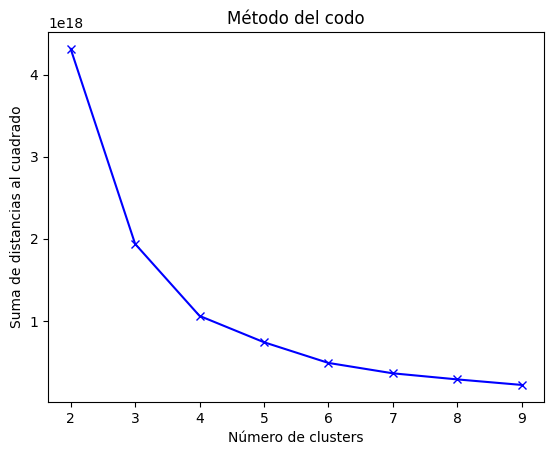

In [26]:
# Defino una lista de posibles números de clusters
num_clusters = range(2, 10)

# Inicialo una lista para almacenar las sumas de las distancias al cuadrado
sum_squared_distances = []

# Calcul0 la suma de las distancias al cuadrado para cada número de clusters
for k in num_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_model)
    sum_squared_distances.append(kmeans.inertia_)

# Grafic0 el método del codo
plt.plot(num_clusters, sum_squared_distances, 'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('Suma de distancias al cuadrado')
plt.title('Método del codo')
plt.show();

In [27]:
# Agregar la columna de etiquetas al DataFrame original
df['cluster_label'] = labels

df.head() # Veo como quedo la columna


,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,...,title,vote_average,vote_count,release_year,return,release_day,release_month,director,actores,cluster_label
index,,,,,,,,,,,,,,,,,,,,,
0,Toy Story Collection,30000000,"[Animation, Comedy, Family]",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,[Pixar Animation Studios],[United States of America],1995-10-30,...,Toy Story,7.7,5415.0,1995,12.451801,Lunes,Octubre,John Lasseter,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",0
1,None,65000000,"[Adventure, Fantasy, Family]",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,...,Jumanji,6.9,2413.0,1995,4.043035,Viernes,Diciembre,Joe Johnston,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",3
2,Grumpy Old Men Collection,0,"[Romance, Comedy]",15602,en,A family wedding reignites the ancient feud be...,11.712900,"[Warner Bros., Lancaster Gate]",[United States of America],1995-12-22,...,Grumpier Old Men,6.5,92.0,1995,0.000000,Viernes,Diciembre,Howard Deutch,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...",1
3,None,16000000,"[Comedy, Drama, Romance]",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[Twentieth Century Fox Film Corporation],[United States of America],1995-12-22,...,Waiting to Exhale,6.1,34.0,1995,5.090760,Viernes,Diciembre,Forest Whitaker,"[Whitney Houston, Angela Bassett, Loretta Devi...",0
4,Father of the Bride Collection,0,[Comedy],11862,en,Just when George Banks has recovered from his ...,8.387519,"[Sandollar Productions, Touchstone Pictures]",[United States of America],1995-02-10,...,Father of the Bride Part II,5.7,173.0,1995,0.000000,Viernes,Febrero,Charles Shyer,"[Steve Martin, Diane Keaton, Martin Short, Kim...",1


In [28]:
# Exporto el df generado anteriormente en formato parquet 
df.to_parquet('df_final_con_modelo', engine='fastparquet')

In [52]:
# Genero dos nuevos df para la funcion de director y actor 
df_actores = df[['id', 'actores', 'return']]
df_director = df[['id', 'director', 'title', 'release_date', 'return', 'budget', 'revenue']]

In [53]:
# Elimino filas con nan que quedaron en director
df_director['director'].dropna(inplace=True)


C:\Users\54280\AppData\Local\Temp\ipykernel_13452\3583566129.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_director['director'].dropna(inplace=True)


In [58]:
# Exporto df_actores y df_directores
df_actores.to_parquet('df_actores', engine='fastparquet')
df_director.to_parquet('df_director', engine='fastparquet')